In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset parcial bloques 1 y 2
df = pd.read_csv("conductual_crecimiento_OK.csv")

# Mostrar las primeras filas del dataset para entender su estructura
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0


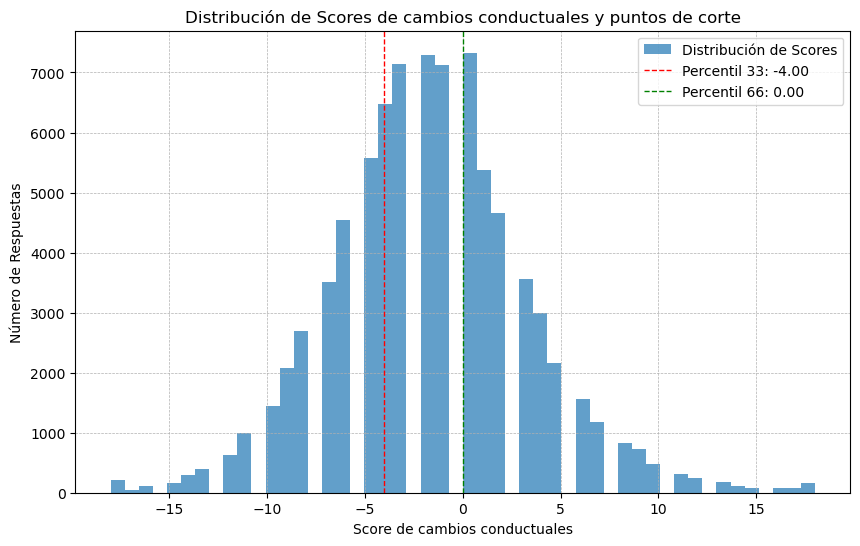

In [ ]:
# Calcular el score total para cada individuo
df['total_score'] = df[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 'Life_Change_5',
                            'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 'Life_Change_9']].sum(axis=1)

# Determinar los percentiles 33 y 66
percentile_33 = np.percentile(df['total_score'], 33)
percentile_66 = np.percentile(df['total_score'], 66)

# Asignar categorías basadas en los percentiles
df['label_change'] = pd.cut(df['total_score'], bins=[-np.inf, percentile_33, percentile_66, np.inf], labels=['low', 'medium', 'high'])

# Visualizar la distribución de los scores y los puntos de corte
plt.figure(figsize=(10, 6))
plt.hist(df['total_score'], bins=50, alpha=0.7, label='Distribución de Scores')
plt.axvline(percentile_33, color='r', linestyle='dashed', linewidth=1, label=f'Percentil 33: {percentile_33:.2f}')
plt.axvline(percentile_66, color='g', linestyle='dashed', linewidth=1, label=f'Percentil 66: {percentile_66:.2f}')
plt.title('Distribución de Scores de cambios conductuales y puntos de corte')
plt.xlabel('Score de cambios conductuales')
plt.ylabel('Número de Respuestas')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Contar la cantidad de individuos en cada categoría
counts = df['label_change'].value_counts().sort_index()
counts

low       29163
medium    28875
high      24738
Name: label_change, dtype: int64

In [ ]:
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,total_score,label_change
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,high
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,high
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,medium
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,high
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,high


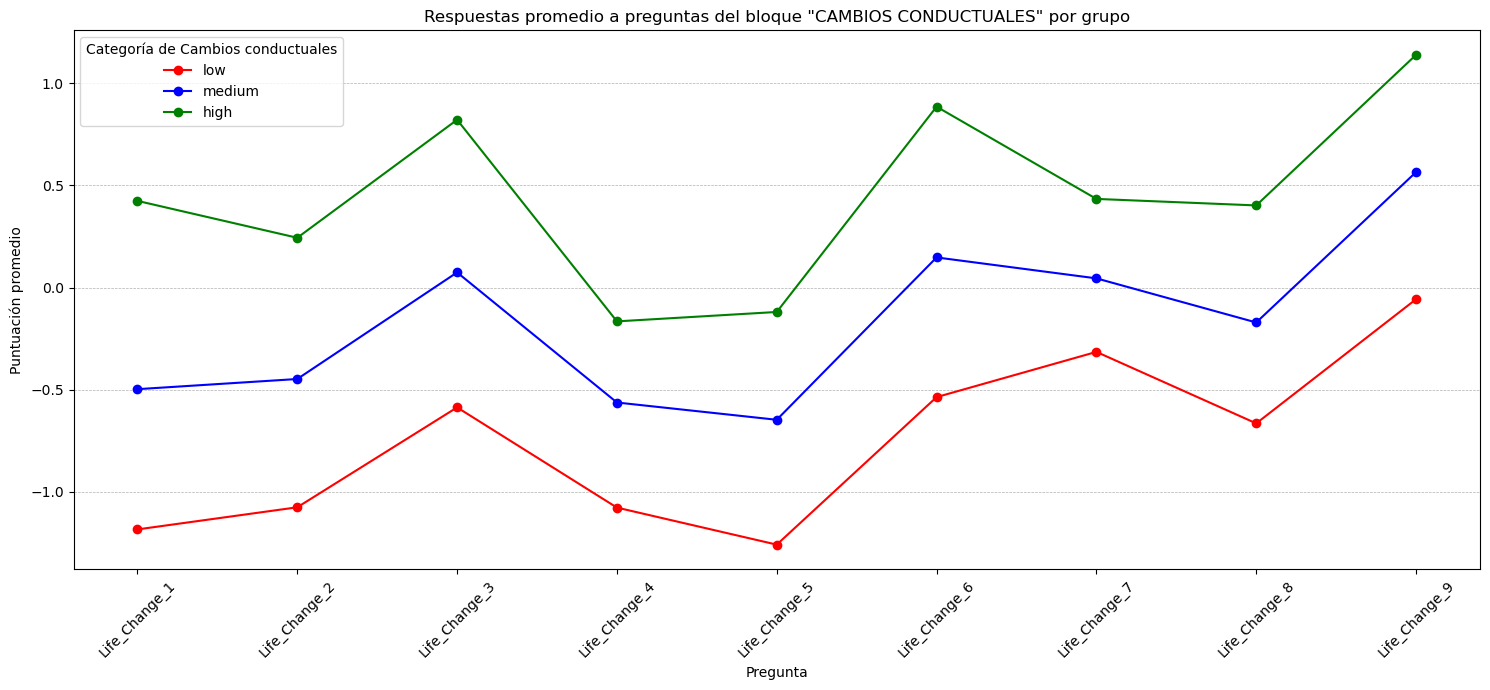

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
label_change,,,,,,,,,
low,-1.183623,-1.075335,-0.586462,-1.076844,-1.258135,-0.536090,-0.314748,-0.664712,-0.056853
medium,-0.497212,-0.447481,0.074251,-0.562494,-0.647030,0.147532,0.045126,-0.170805,0.565299
high,0.424327,0.243755,0.821368,-0.165414,-0.119371,0.885359,0.433988,0.402094,1.139219


In [ ]:
# Calculamos nuevamente los valores medios para cada variable en cada grupo
grouped_means = df.groupby('label_change')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4',
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8',
                                         'Life_Change_9']].mean()
colors = {
    "low": "red",
    "medium": "blue",
    "high": "green"
}

# Gráfica de líneas con las respuestas promedio a lo largo de las preguntas para cada grupo
plt.figure(figsize=(15, 7))

# Dibujar cada grupo con su respectivo color
for group in grouped_means.index:
    plt.plot(grouped_means.columns, grouped_means.loc[group], marker='o', label=group, color=colors[group])

plt.title('Respuestas promedio a preguntas del bloque "CAMBIOS CONDUCTUALES" por grupo')
plt.ylabel('Puntuación promedio')
plt.xlabel('Pregunta')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría de Cambios conductuales')
plt.show()

# Mostrar la tabla en formato de dataframe
df_grouped_means = pd.DataFrame(grouped_means)
df_grouped_means

## Índice de silueta (_silhouette score_)
Mide qué tan similar es un objeto a su propio clúster comparado con otros clústeres. Los valores cercanos a +1 indican que el objeto está bien emparejado con su propio clúster y mal emparejado con los vecinos.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Calcula las puntuaciones de silueta para cada muestra
X = df.iloc[:, :14]
labels = df['label_change'].values
silhouette_vals = silhouette_samples(X, labels)

In [ ]:
# Calcular las puntuaciones de silueta para cada muestra
silhouette_vals = silhouette_samples(X, labels)

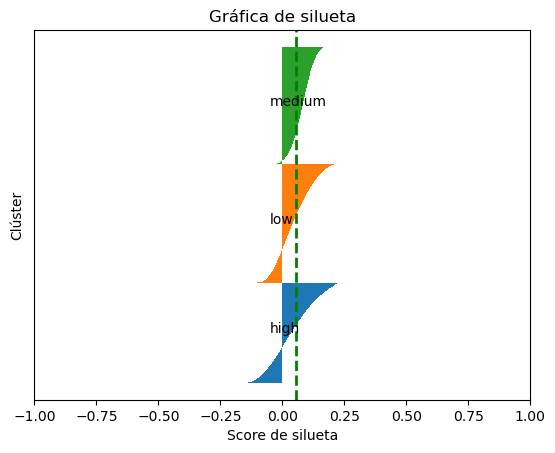

In [ ]:
# Configuración para la visualización
y_ticks = []
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(labels))

# Iterar a través de todos los clústeres
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(cluster))
    y_lower += len(cluster_silhouette_vals)

# Puntuación de silueta promedio
avg_score = np.mean(silhouette_vals)
plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')

plt.yticks([])
plt.xlim([-1, 1])
plt.xlabel('Score de silueta')
plt.ylabel('Clúster')
plt.title('Gráfica de silueta')
plt.show()